In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [28]:
df = pd.read_csv("BBC News Train.csv")
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [3]:
df.shape

(1490, 3)

In [4]:
df.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [5]:
df['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

We saw that the number of articles per class is roughly balanced, which is helpful. 
If our dataset were imbalanced, we would need to carefully configure our model or artificially balance the dataset, for example by undersampling or oversampling each class.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


### Preprocessing

In [12]:
#text_file = open("stopwords.txt","r")
#stopwords = text_file.read().split('\n')
import nltk
stopwords = nltk.corpus.stopwords.words('english')

In [13]:
data = df.copy()

In [16]:
data['news_without_stopwords'] = data['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [17]:
print(len(data['news_without_stopwords'][0]))

1455


In [24]:
print(data['news_without_stopwords'])

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens maj...
3       lifestyle governs mobile choice faster better ...
4       enron bosses $168m payout eighteen former enro...
                              ...                        
1485    double eviction big brother model caprice holb...
1486    dj double act revamp chart show dj duo jk joel...
1487    weak dollar hits reuters revenues media group ...
1488    apple ipod family expands market apple expande...
1489    santy worm makes unwelcome visit thousands web...
Name: news_without_stopwords, Length: 1490, dtype: object


## Porter Stemming

In [22]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
data['news_porter_stemmed'] = data['news_without_stopwords'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
print(data['news_without_stopwords'][0])

worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers battery fraud charges called company whistleblower first witness. cynthia cooper worldcom ex-head internal accounting alerted directors irregular accounting practices us telecoms giant 2002. warnings led collapse firm following discovery $11bn (£5.7bn) accounting fraud. mr ebbers pleaded guilty charges fraud conspiracy. prosecution lawyers argued mr ebbers orchestrated series accounting tricks worldcom ordering employees hide expenses inflate revenues meet wall street earnings estimates. ms cooper runs consulting business told jury new york wednesday external auditors arthur andersen approved worldcom accounting early 2001 2002. said andersen given green light procedures practices used worldcom. mr ebber lawyers said unaware fraud arguing auditors alert problems. ms cooper also said shareholder meetings mr ebbers often passed technical questions company finance chief giving brief answers himself. pr

In [25]:
## converting to lowercase

In [26]:
data['news_porter_stemmed'] = data['news_porter_stemmed'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
data['news_porter_stemmed'][0]

'worldcom ex-boss launch defenc lawyer defend former worldcom chief berni ebber batteri fraud charg call compani whistleblow first witness. cynthia cooper worldcom ex-head intern account alert director irregular account practic us telecom giant 2002. warn led collaps firm follow discoveri $11bn (£5.7bn) account fraud. mr ebber plead guilti charg fraud conspiracy. prosecut lawyer argu mr ebber orchestr seri account trick worldcom order employe hide expens inflat revenu meet wall street earn estimates. ms cooper run consult busi told juri new york wednesday extern auditor arthur andersen approv worldcom account earli 2001 2002. said andersen given green light procedur practic use worldcom. mr ebber lawyer said unawar fraud argu auditor alert problems. ms cooper also said sharehold meet mr ebber often pass technic question compani financ chief give brief answer himself. prosecut star wit former worldcom financi chief scott sullivan said mr ebber order account adjust firm tell hit book . h

In [31]:
## Dataset preprocessing
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0,len(data)):
    review = re.sub('[^a-zA-Z]',' ',data['Text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [32]:
corpus

['worldcom ex boss launch defenc lawyer defend former worldcom chief berni ebber batteri fraud charg call compani whistleblow first wit cynthia cooper worldcom ex head intern account alert director irregular account practic us telecom giant warn led collaps firm follow discoveri bn bn account fraud mr ebber plead guilti charg fraud conspiraci prosecut lawyer argu mr ebber orchestr seri account trick worldcom order employe hide expens inflat revenu meet wall street earn estim ms cooper run consult busi told juri new york wednesday extern auditor arthur andersen approv worldcom account earli said andersen given green light procedur practic use worldcom mr ebber lawyer said unawar fraud argu auditor alert problem ms cooper also said sharehold meet mr ebber often pass technic question compani financ chief give brief answer prosecut star wit former worldcom financi chief scott sullivan said mr ebber order account adjust firm tell hit book howev ms cooper said mr sullivan mention anyth uncom

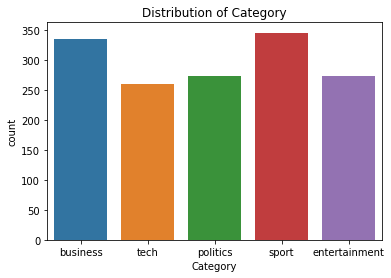

In [7]:
sns.countplot(data=df,x="Category")
plt.title("Distribution of Category")
plt.show()

In [8]:
# show the describe include object
df.describe(include='object')

,Text,Category
count,1490,1490
unique,1440,5
top,microsoft seeking spyware trojan microsoft is ...,sport
freq,2,346


## EDA

In [9]:
#calculate the length of the reviews
df['length'] = df['Text'].apply(len)

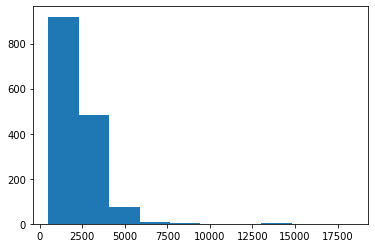

In [10]:
plt.hist(x=df['length'])
plt.show()

## Text Polarity

In [11]:
!pip install textblob 

In [12]:
#Calculate the polarity of the reviews
from textblob import TextBlob
def get_polarity(text):
    textblob = TextBlob(text)
    pol = textblob.sentiment.polarity
    return pol

#apply the function
df['polarity']= df['Text'].apply(get_polarity)

## Text subjectivity

In [13]:
def get_subjectivity(text):
    textblob = TextBlob(str(text))
    subj = textblob.sentiment.subjectivity
    return subj

# lets apply the function
df['subjectivity'] = df['Text'].apply(get_subjectivity)

In [14]:
## lets summarize the newly created feature
df[['length','polarity','Text']]

,length,polarity,Text
0,1866,0.023320,worldcom ex-boss launches defence lawyers defe...
1,2016,0.077917,german business confidence slides german busin...
2,3104,0.077754,bbc poll indicates economic gloom citizens in ...
3,3618,0.156109,lifestyle governs mobile choice faster bett...
4,2190,0.009685,enron bosses in $168m payout eighteen former e...
...,...,...,...
1485,1266,0.107292,double eviction from big brother model caprice...
1486,3111,0.221375,dj double act revamp chart show dj duo jk and ...
1487,1370,0.066856,weak dollar hits reuters revenues at media gro...
1488,3242,0.203186,apple ipod family expands market apple has exp...


## Visualizing Polarity and Subjectivity

C:\Users\Aspire 5\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aspire 5\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


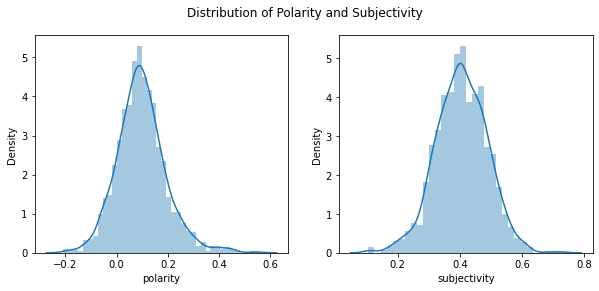

In [15]:
# Visualizing Polarity and subjectivity

plt.rcParams['figure.figsize'] = (10,4)

plt.subplot(1,2,1)
sns.distplot(df['polarity'])

plt.subplot(1,2,2)
sns.distplot(df['subjectivity'])

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()


C:\Users\Aspire 5\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


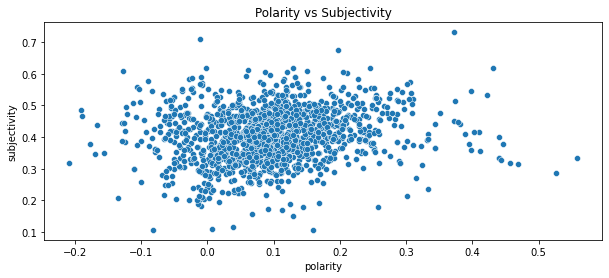

In [16]:
# lets check relation between polarity and subjectivity

sns.scatterplot(df['polarity'], df['subjectivity'])
plt.title('Polarity vs Subjectivity')
plt.show()

<AxesSubplot: >

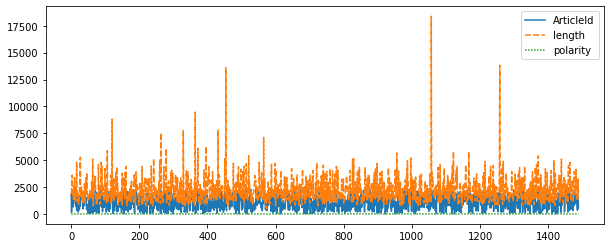

In [17]:
sns.lineplot(data=df.drop(['subjectivity'], axis=1))

<AxesSubplot: >

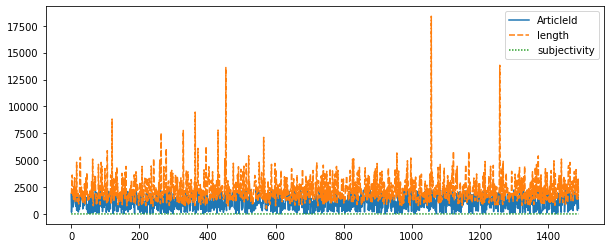

In [18]:
sns.lineplot(data=df.drop(['polarity'], axis=1))

In [21]:
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

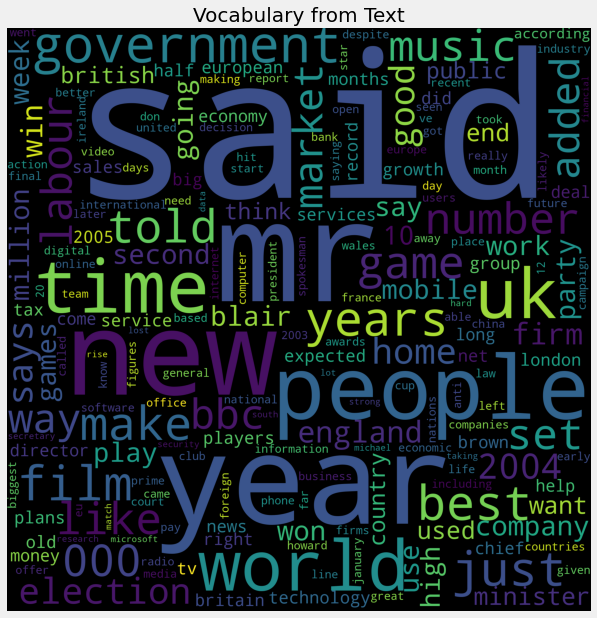

In [24]:
#countvectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df['Text'])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x:x[1], reverse=True)

wordcloud = WordCloud(background_color = 'black', width=2000, height=2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Vocabulary from Text', fontsize=20)
plt.show()

## Using Feature Extraction

In [26]:
df['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [27]:
#balanced classes
num_of_categories = 45000
shuffled = df.reindex(np.random.permutation(df.index))
sport = shuffled[shuffled['Category']=='sport'][:num_of_categories]
business = shuffled[shuffled['Category']=='business'][:num_of_categories]
politics = shuffled[shuffled['Category']=='politics'][:num_of_categories]
entertainment = shuffled[shuffled['Category']=='entertainment'][:num_of_categories]
tech = shuffled[shuffled['Category']=='tech'][:num_of_categories]
concated = pd.concat([sport,business,politics,entertainment,tech], ignore_index=True)

#shuffle the dataset
concated = concated.reindex(np.random.permutation(concated.index))
concated['LABEL'] = 0

In [29]:
#One-hot encode the lab
from keras.utils.np_utils import to_categorical
concated.loc[concated['Category'] == 'sport', 'LABLE'] = 0
concated.loc[concated['Category'] == 'business', 'LABEL'] = 1
concated.loc[concated['Category'] == 'politics', 'LABEL'] = 2
concated.loc[concated['Category'] == 'entertainment', 'LABEL'] = 3
concated.loc[concated['Category'] == 'tech', 'LABEL'] = 4
print(concated['LABEL'][:10])
labels= to_categorical(concated['LABEL'], num_classes=5)
print(labels[:10])
if 'Category' in concated.keys():
    concated.drop(['Category'], axis=1)
    


684     2
1371    4
1045    3
849     2
908     2
784     2
227     0
233     0
715     2
850     2
Name: LABEL, dtype: int64
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [33]:
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
n_most_common_words = 8000
max_len = 130
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,:;<>=?{[/\]}^_|~', lower=True)
tokenizer.fit_on_texts(concated['Text'].values)
sequences = tokenizer.texts_to_sequences(concated['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)


Found 33836 unique tokens.


In [34]:
print("Shape of X:",len(X))

Shape of X: 1490


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=42)

In [49]:
epochs = 50
emb_dim = 128
batch_size = 64
labels[:2]

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

## Using model LSTM

In [50]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

((1117, 130), (1117, 5), (373, 130), (373, 5))


In [51]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(5, activation='softmax'))

In [52]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [53]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 130, 128)          1024000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 130, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 1,073,733
Trainable params: 1,073,733
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,
                    callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.01)])

Epoch 1/50
14/14 [==============================] - 23s 492ms/step - loss: 1.6083 - acc: 0.2139 - val_loss: 1.6093 - val_acc: 0.1830
Epoch 2/50
14/14 [==============================] - 4s 324ms/step - loss: 1.6001 - acc: 0.2598 - val_loss: 1.6075 - val_acc: 0.1875
Epoch 3/50
14/14 [==============================] - 5s 326ms/step - loss: 1.5913 - acc: 0.2598 - val_loss: 1.6069 - val_acc: 0.1875
Epoch 4/50
14/14 [==============================] - 4s 314ms/step - loss: 1.5748 - acc: 0.2654 - val_loss: 1.6036 - val_acc: 0.1875
Epoch 5/50
14/14 [==============================] - 4s 320ms/step - loss: 1.5366 - acc: 0.3068 - val_loss: 1.4576 - val_acc: 0.3616
Epoch 6/50
14/14 [==============================] - 4s 320ms/step - loss: 1.3380 - acc: 0.4502 - val_loss: 1.2272 - val_acc: 0.4777
Epoch 7/50
14/14 [==============================] - 5s 347ms/step - loss: 1.2264 - acc: 0.5510 - val_loss: 1.3154 - val_acc: 0.5491
Epoch 8/50
14/14 [==============================] - 5s 369ms/step - loss: 1

In [55]:
accr = model.evaluate(X_test,y_test)
print('Test set\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(accr[0], accr[1]))

12/12 [==============================] - 1s 50ms/step - loss: 0.5454 - acc: 0.8847
Test set
 Loss: 0.545
 Accuracy: 0.885


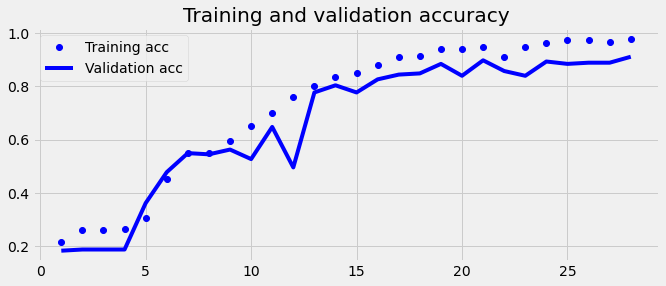

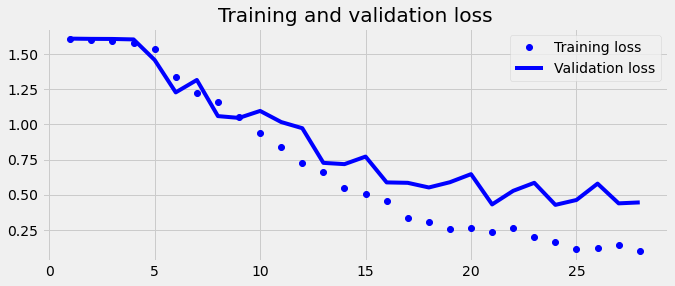

In [56]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Make prediction

In [57]:
txt = ["wales silent on grand slam talk rhys williams "]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
labels = ['sport','business','politics','entertainment','tech']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 2s 2s/step
[[9.9786818e-01 1.8495893e-04 1.5526579e-03 3.2457960e-04 6.9722366e-05]] sport
